In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

df_orignal = pd.read_csv("C:/Users/DELL/OneDrive/Documents/wind_dataset.csv",index_col="DATE", parse_dates= True)
print(df_orignal.head())

             WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G
DATE                                                             
1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0
1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1
1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5
1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2
1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5


In [22]:
df = df_orignal[['WIND']].copy()
df.head()

,WIND
DATE,
1961-01-01,13.67
1961-01-02,11.50
1961-01-03,11.25
1961-01-04,8.63
1961-01-05,11.92


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WIND    6574 non-null   float64
dtypes: float64(1)
memory usage: 102.7 KB


In [24]:
df.describe()

,WIND
count,6574.000000
mean,9.796834
std,4.977272
min,0.000000
25%,6.000000
50%,9.210000
75%,12.960000
max,30.370000


In [25]:
rows,columns=df.shape[0],df.shape[1]
print(rows)
print(columns)

6574
1


In [26]:
no_of_nan_values=df.isna().sum().sum()
no_of_nan_values

0

<AxesSubplot:xlabel='DATE', ylabel='WIND'>

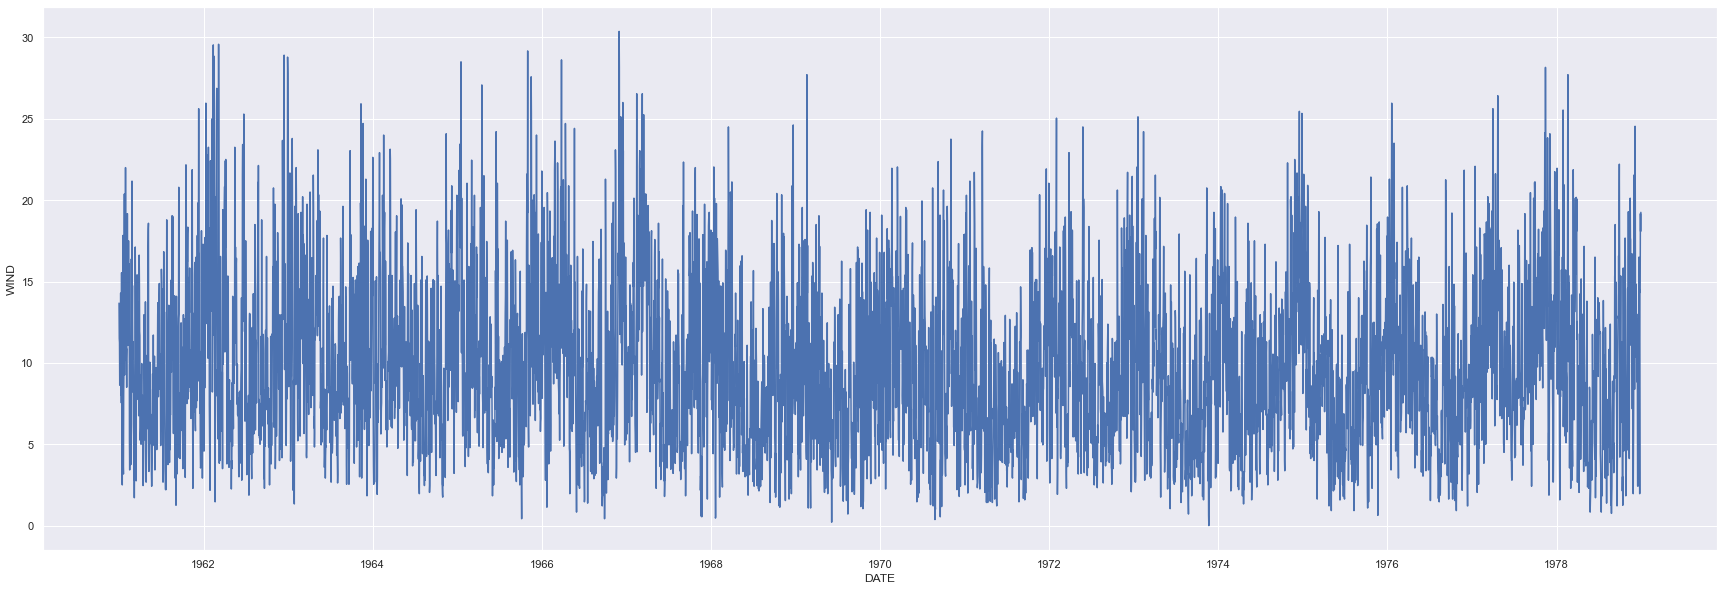

In [37]:
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(data=df,x="DATE", y= df["WIND"])

In [17]:
start_date=pd.to_datetime('1961-01-01')
new_df=df[start_date:'1961-12-31']
new_df

,WIND
DATE,
1961-01-01,13.67
1961-01-02,11.50
1961-01-03,11.25
1961-01-04,8.63
1961-01-05,11.92
...,...
1961-12-27,2.92
1961-12-28,8.96
1961-12-29,15.00


<AxesSubplot:xlabel='DATE', ylabel='WIND'>

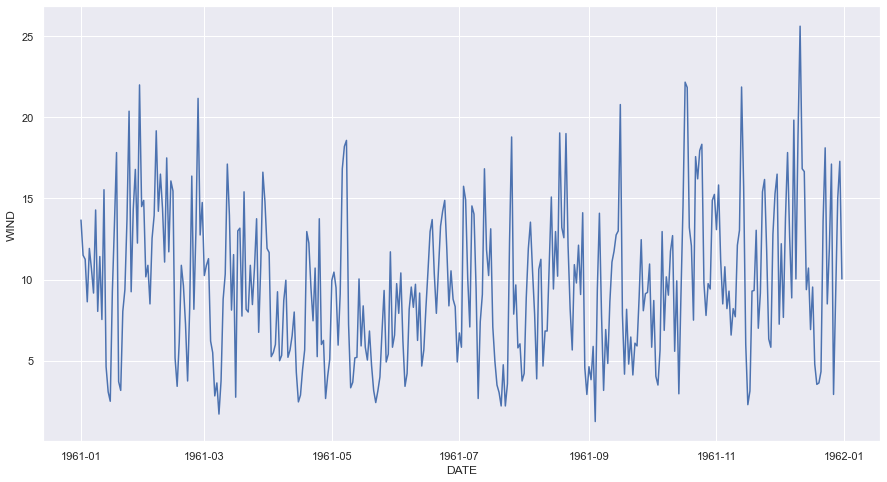

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=new_df,x="DATE", y= df["WIND"])

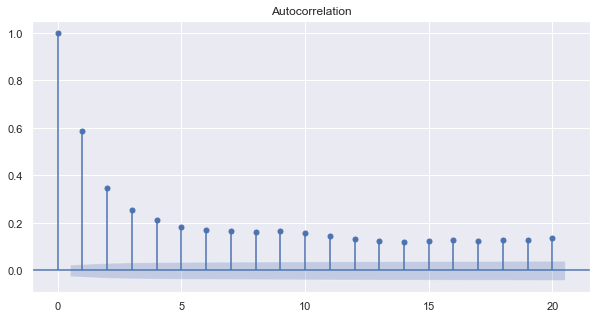

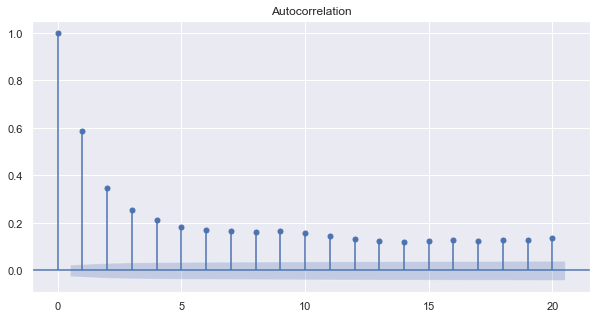

In [31]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['WIND'], lags=20)

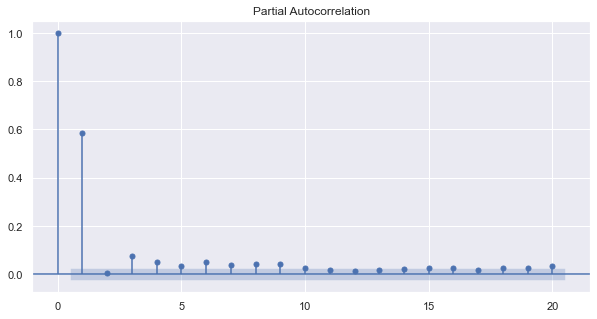

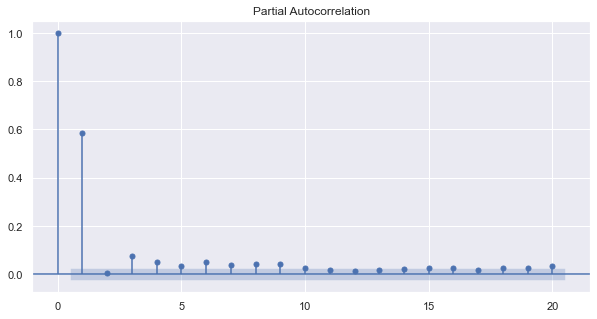

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['WIND'], lags = 20)

In [34]:
result=seasonal_decompose(df['WIND'], model='addative', period = 1)

<AxesSubplot:xlabel='DATE'>

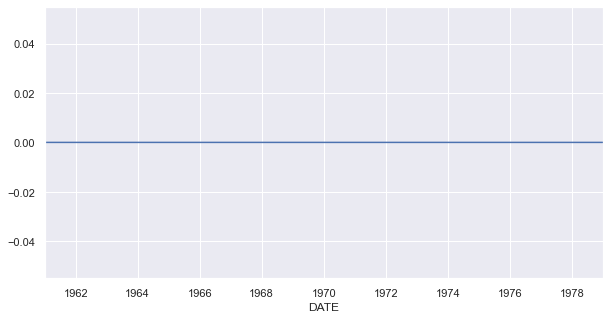

In [35]:
result.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

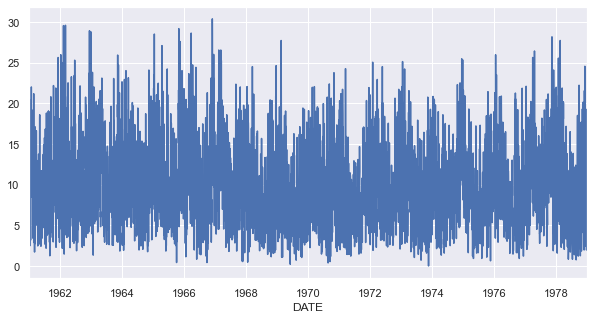

In [36]:
result.trend.plot()

<AxesSubplot:xlabel='DATE'>

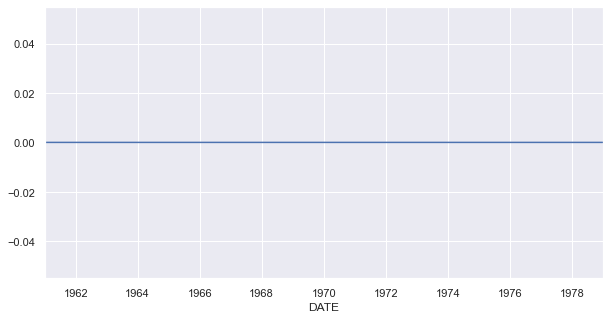

In [37]:
result.resid.plot()

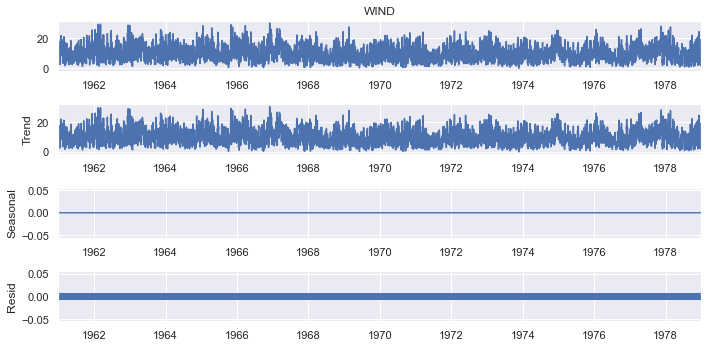

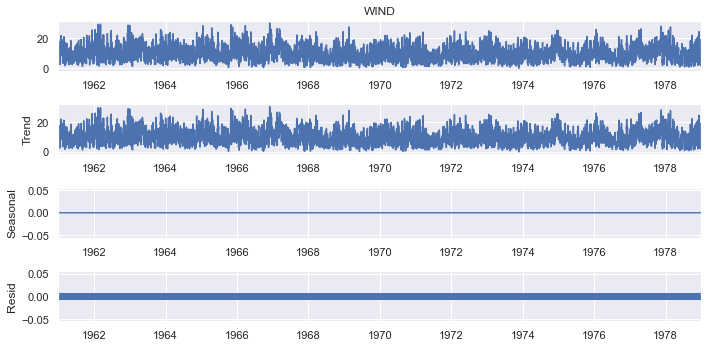

In [38]:
result.plot()

In [39]:
df['first_diff']=df['WIND'].diff(periods=1)
df.head(10)

,WIND,first_diff
DATE,,
1961-01-01,13.67,NaN
1961-01-02,11.50,-2.17
1961-01-03,11.25,-0.25
1961-01-04,8.63,-2.62
1961-01-05,11.92,3.29
1961-01-06,10.67,-1.25
1961-01-07,9.17,-1.50
1961-01-08,14.29,5.12
1961-01-09,8.04,-6.25


In [40]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df['first_diff'].dropna(),autolag="AIC")
output_df = pd.DataFrame({"WIND":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

          WIND                       Metric
0   -21.701927              Test Statistics
1     0.000000                      p-value
2    34.000000             No. of lags used
3  6538.000000  Number of observations used
4    -3.431351          critical value (1%)
5    -2.861982          critical value (5%)
6    -2.567005         critical value (10%)


#### We can see that our data is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than critical value

In [41]:
import statsmodels.api as sm
sm.tsa.stattools.kpss(df.first_diff.dropna(), regression='ct')


(0.004289981088837934,
 0.1,
 35,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

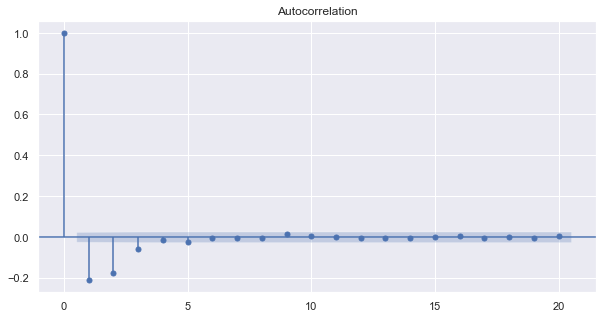

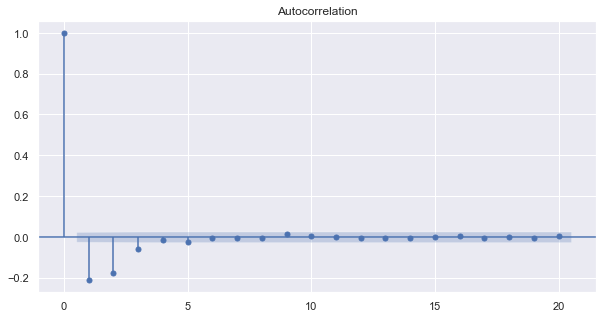

In [42]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.first_diff.dropna(), lags=20)

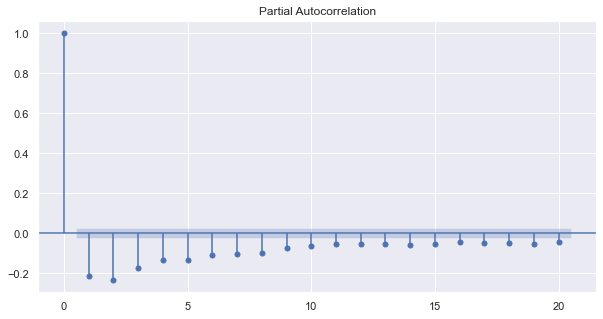

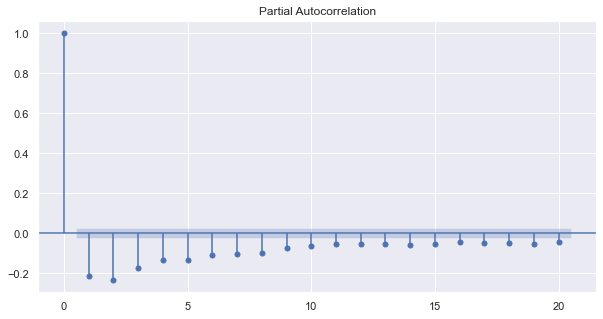

In [43]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.first_diff.dropna(), lags=20)

In [44]:
train_end= pd.to_datetime('1977-12-31') #-pd.Timedelta("30min")
train_end

Timestamp('1977-12-31 00:00:00')

In [46]:
train_data=df.WIND[:train_end].dropna()
test_data=df.WIND[train_end:].dropna()
test_data.head()

DATE
1977-12-31    15.59
1978-01-01    14.71
1978-01-02    17.08
1978-01-03    21.96
1978-01-04     8.38
Name: WIND, dtype: float64

In [47]:
len(train_data),len(test_data)


(6209, 366)

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
k = train_data

In [50]:
arima_value = ARIMA(k, order=(1,1,1))
model1 = arima_value.fit()
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.WIND   No. Observations:                 6208
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17388.072
Method:                       css-mle   S.D. of innovations              3.982
Date:                Wed, 15 Feb 2023   AIC                          34784.145
Time:                        09:13:51   BIC                          34811.079
Sample:                    01-02-1961   HQIC                         34793.482
                         - 12-31-1977                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.003      0.108      0.914      -0.006       0.007
ar.L1.D.WIND     0.5100      0.012     41.908      0.000       0.486       0.534
ma.L1.D.WIND    -0.9680      0.004   -262.15

In [56]:
arima_value = ARIMA(k, order=(3,1,2))
model2 = arima_value.fit()
print(model2.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.WIND   No. Observations:                 6208
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -17379.861
Method:                       css-mle   S.D. of innovations              3.977
Date:                Wed, 15 Feb 2023   AIC                          34773.723
Time:                        09:17:36   BIC                          34820.858
Sample:                    01-02-1961   HQIC                         34790.063
                         - 12-31-1977                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.003      0.106      0.916      -0.006       0.007
ar.L1.D.WIND     0.7297      0.469      1.557      0.119      -0.189       1.648
ar.L2.D.WIND    -0.1628      0.247     -0.65

In [57]:
arima_value = ARIMA(k, order=(3,1,1))
model3 = arima_value.fit()
print(model3.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.WIND   No. Observations:                 6208
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -17379.963
Method:                       css-mle   S.D. of innovations              3.977
Date:                Wed, 15 Feb 2023   AIC                          34771.925
Time:                        09:18:18   BIC                          34812.327
Sample:                    01-02-1961   HQIC                         34785.931
                         - 12-31-1977                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.003      0.105      0.917      -0.006       0.007
ar.L1.D.WIND     0.5315      0.013     39.764      0.000       0.505       0.558
ar.L2.D.WIND    -0.0580      0.014     -4.01

In [58]:
#residual = model3.resid

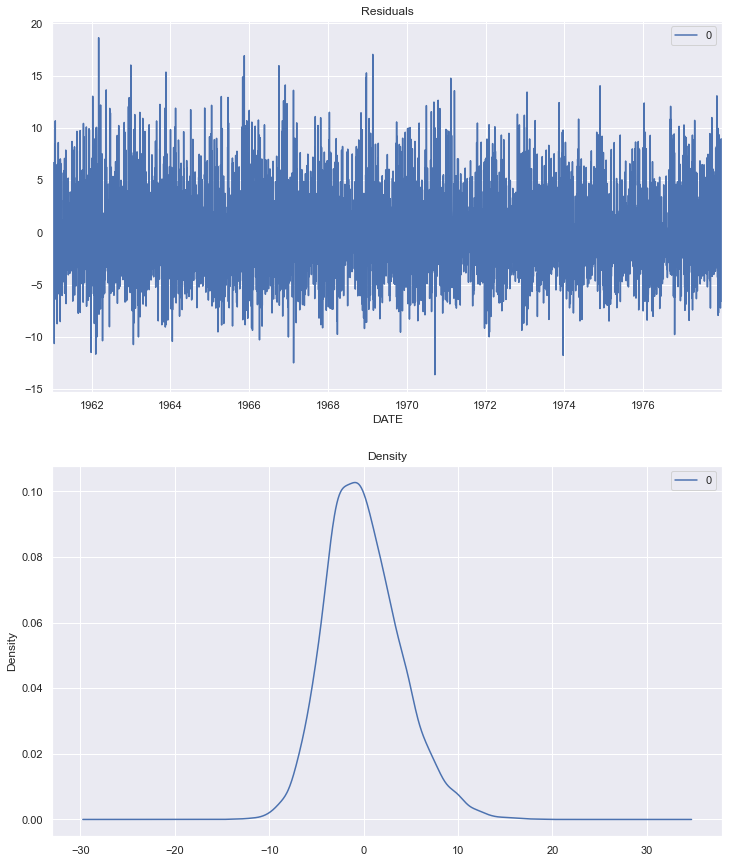

In [59]:
residuals = pd.DataFrame(model3.resid)
fig, ax = plt.subplots(2,1, figsize = [12,15])
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [60]:
am = ARIMA(train_data, order=(3,1,1)) 
t = am.fit()
print(t.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.WIND   No. Observations:                 6208
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -17379.963
Method:                       css-mle   S.D. of innovations              3.977
Date:                Wed, 15 Feb 2023   AIC                          34771.925
Time:                        09:18:37   BIC                          34812.327
Sample:                    01-02-1961   HQIC                         34785.931
                         - 12-31-1977                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.003      0.105      0.917      -0.006       0.007
ar.L1.D.WIND     0.5315      0.013     39.764      0.000       0.505       0.558
ar.L2.D.WIND    -0.0580      0.014     -4.01

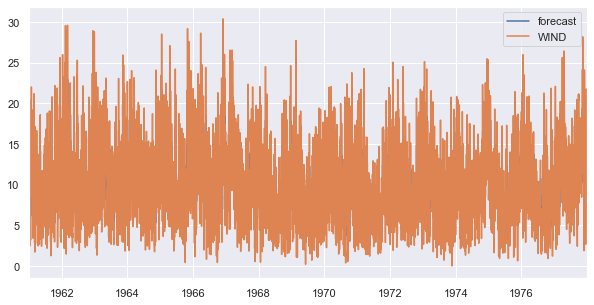

In [61]:
t.plot_predict(dynamic=False)
plt.show()

In [62]:
fc, se, cf = t.forecast(len(test_data), alpha = 0.05)
fc_series = pd.Series(fc)

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = test_data
predictions = fc_series
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 6.371652


In [64]:
#forecasting for 20 units

In [65]:
am1 = ARIMA(df.WIND, order=(3,1,1)) 
t1 = am.fit()


In [66]:
fc, se, cf = t1.forecast(20, alpha = 0.05)
fc

array([14.26390355, 13.66070824, 13.38459858, 13.23811921, 13.16058735,
       13.12078869, 13.10045649, 13.09009601, 13.08489913, 13.08238047,
       13.08124814, 13.08083314, 13.08078946, 13.080938  , 13.08118604,
       13.08148558, 13.08181179, 13.08215179, 13.08249894, 13.08284979])